# Taxi Fare Prediction Study For NYC Green Taxi Using Regression

This is a real time data set.

#  Problem Statement:
The objective of this study is to analyze and predict the total fare of taxi trips based on historical data. The total fare, represented by the "Total_amount" field, is influenced by various factors such as trip distance, time of day, location, passenger count, and payment method. This study aims to understand the key drivers of fare amounts and develop a predictive model that can estimate the total fare accurately.

# Data Description
we have total of 69174 rows and 17 columns. you need to predict on the Total_Amount.

#  Taxi Fare Prediction Study
The dataset used for the taxi fare prediction study contains information related to individual taxi trips. The dataset is structured with the following fields:

1. VendorID (Categorical): A code indicating the LPEP provider that provided the record. It takes on two values:
    1: Creative Mobile Technologies, LLC
    2: VeriFone Inc.

2. lpep_pickup_datetime (DateTime): The date and time when the taxi meter was engaged, marking the start of the trip.

3. lpep_dropoff_datetime (DateTime): The date and time when the taxi meter was disengaged, indicating the end of the trip.

4. Passenger_count (Numeric): The number of passengers in the vehicle, entered by the driver.

5. Trip_distance (Numeric): The elapsed trip distance in miles reported by the taxi meter.

6. PULocationID (Categorical): TLC Taxi Zone in which the taxi meter was engaged, representing the pickup location.

7. DOLocationID (Categorical): TLC Taxi Zone in which the taxi meter was disengaged, representing the drop-off location.

8. RateCodeID (Categorical): The final rate code in effect at the end of the trip. It includes the following values:
    1: Standard rate
    2: JFK
    3: Newark
    4: Nassau or Westchester
    5: Negotiated fare
    6: Group ride
9. Store_and_fwd_flag (Categorical): A flag indicating whether the trip record was stored in the vehicle's memory before being sent to the vendor. It can take one of two values:
    "Y": Store and forward trip
    "N": Not a store and forward trip
10. Payment_type (Categorical): A numeric code signifying how the passenger paid for the trip, with values:

    1: Credit card
    2: Cash
    3: No charge
    4: Dispute
    5: Unknown
    6: Voided trip
11. Fare_amount (Numeric): The time-and-distance fare calculated by the taxi meter.

12. Extra (Numeric): Miscellaneous extras and surcharges, which may include rush hour and overnight charges.

13. MTA_tax (Numeric): A $0.50 MTA tax automatically triggered based on the metered rate in use.

14. Improvement_surcharge (Numeric): A $0.30 improvement surcharge assessed on hailed trips at the flag drop. This surcharge began being levied in 2015.

15. Tip_amount (Numeric): This field is automatically populated for credit card tips. Cash tips are not included.

16. Tolls_amount (Numeric): Total amount of all tolls paid during the trip.

17. Total_amount (Numeric): The total amount charged to passengers, which does not include cash tips.

#  Performance metric
1. Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and provides an interpretable measure of prediction error in the same units as the target variable. It is more interpretable than MSE.

2. R-squared (R2): R-squared measures the proportion of the variance in the target variable that is predictable from the independent variables. It ranges from 0 to 1, where a higher R-squared value indicates a better fit of the model to the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Taxi"

C:\Taxi


In [3]:
!pip install pyarrow

In [4]:
greentaxi=pd.read_parquet("green_tripdata_2023-05.parquet",engine="pyarrow")
# pyarrow is library for importing parquet file

In [5]:
greentaxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69174 entries, 0 to 69173
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               69174 non-null  int32         
 1   lpep_pickup_datetime   69174 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  69174 non-null  datetime64[ns]
 3   store_and_fwd_flag     64442 non-null  object        
 4   RatecodeID             64442 non-null  float64       
 5   PULocationID           69174 non-null  int32         
 6   DOLocationID           69174 non-null  int32         
 7   passenger_count        64442 non-null  float64       
 8   trip_distance          69174 non-null  float64       
 9   fare_amount            69174 non-null  float64       
 10  extra                  69174 non-null  float64       
 11  mta_tax                69174 non-null  float64       
 12  tip_amount             69174 non-null  float64       
 13  t

In [6]:
greentaxi=greentaxi.drop("ehail_fee",axis=1) #drop null column

In [7]:
# create a new variable called "trip_duration"
greentaxi["trip_duration"]=greentaxi.lpep_dropoff_datetime-greentaxi.lpep_pickup_datetime

In [8]:
greentaxi.trip_duration.head()

0   0 days 00:13:16
1   0 days 00:20:22
2   0 days 00:06:53
3   0 days 00:20:27
4   0 days 00:03:28
Name: trip_duration, dtype: timedelta64[ns]

In [9]:
#dt refers to datetime library in pandas
greentaxi.trip_duration=greentaxi.trip_duration.dt.total_seconds()/60

In [10]:
# Extract New variable "weekday" from datetime
greentaxi["weekday"]=greentaxi.lpep_dropoff_datetime.dt.weekday

In [11]:
greentaxi.weekday.value_counts(dropna=False)
# monday - 0 & sunday - 6

weekday
2    11980
1    11062
0    10934
3    10085
4     9737
5     8144
6     7232
Name: count, dtype: int64

In [12]:
# Extract New variable "hourofday" from datetime
greentaxi["hourofday"]=greentaxi.lpep_dropoff_datetime.dt.hour

In [13]:
greentaxi.hourofday.value_counts(dropna=False)

hourofday
18    5497
17    5260
16    4986
19    4707
15    4693
14    4140
12    3893
11    3729
13    3676
9     3620
10    3548
20    3458
8     3088
21    2999
22    2461
7     2376
23    1896
0     1337
6      915
1      873
2      645
3      524
4      439
5      414
Name: count, dtype: int64

In [14]:
greentaxi.isnull().sum().sort_values(ascending=False)

trip_type                4735
store_and_fwd_flag       4732
RatecodeID               4732
congestion_surcharge     4732
passenger_count          4732
payment_type             4732
VendorID                    0
tolls_amount                0
weekday                     0
trip_duration               0
total_amount                0
improvement_surcharge       0
mta_tax                     0
tip_amount                  0
lpep_pickup_datetime        0
extra                       0
fare_amount                 0
trip_distance               0
DOLocationID                0
PULocationID                0
lpep_dropoff_datetime       0
hourofday                   0
dtype: int64

In [15]:
greentaxi.trip_type.value_counts(dropna=False)

trip_type
1.0    62256
NaN     4735
2.0     2183
Name: count, dtype: int64

In [16]:
greentaxi.trip_type=greentaxi.trip_type.fillna(1.0)

In [17]:
greentaxi.store_and_fwd_flag.value_counts(dropna=False)

store_and_fwd_flag
N       64240
None     4732
Y         202
Name: count, dtype: int64

In [18]:
greentaxi.store_and_fwd_flag=greentaxi.store_and_fwd_flag.fillna("N")

In [19]:
greentaxi.RatecodeID.value_counts(dropna=False)

RatecodeID
1.0     61692
NaN      4732
5.0      2430
2.0       220
4.0        63
3.0        34
99.0        3
Name: count, dtype: int64

In [20]:
greentaxi.RatecodeID=greentaxi.RatecodeID.fillna(1.0)

In [21]:
greentaxi.congestion_surcharge.describe()

count    64442.000000
mean         0.746311
std          1.223041
min         -2.750000
25%          0.000000
50%          0.000000
75%          2.750000
max          2.750000
Name: congestion_surcharge, dtype: float64

In [22]:
greentaxi.congestion_surcharge=greentaxi.congestion_surcharge.fillna(
greentaxi.congestion_surcharge.median())

In [23]:
greentaxi.passenger_count.value_counts(dropna=False)

passenger_count
1.0    54760
2.0     5632
NaN     4732
5.0     1466
3.0      937
6.0      755
0.0      628
4.0      255
7.0        7
9.0        1
8.0        1
Name: count, dtype: int64

In [24]:
greentaxi.passenger_count=greentaxi.passenger_count.fillna(1.0)

In [25]:
greentaxi.payment_type.value_counts(dropna=False)

payment_type
1.0    42558
2.0    21337
NaN     4732
3.0      402
4.0      144
5.0        1
Name: count, dtype: int64

In [26]:
greentaxi.payment_type=greentaxi.payment_type.fillna(1.0)

In [27]:
greentaxi.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'trip_duration',
       'weekday', 'hourofday'],
      dtype='object')

<Axes: ylabel='count'>

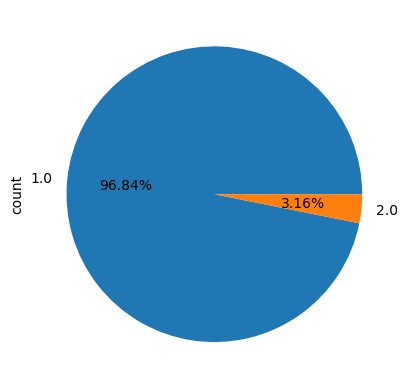

In [28]:
#pie diagrams of-trip_type,payment_type,RatecodeId
greentaxi.trip_type.value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

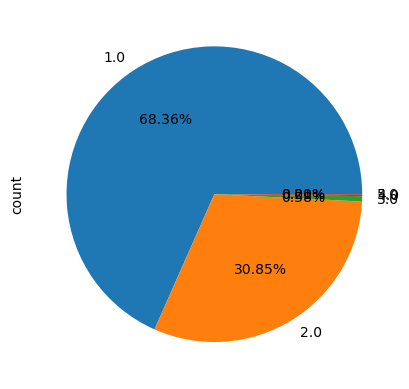

In [29]:
greentaxi.payment_type.value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

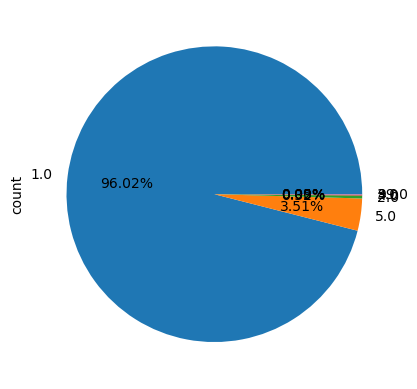

In [30]:
greentaxi.RatecodeID.value_counts().plot(kind='pie',autopct='%0.2f%%')

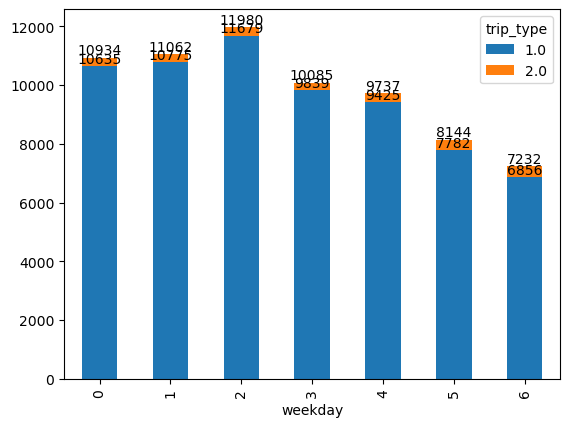

In [31]:
#stacked Bar diagram of weekdayand trip_type,weekday&payment_type,hour and payment_type
ax=pd.crosstab(greentaxi.weekday,greentaxi.trip_type).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

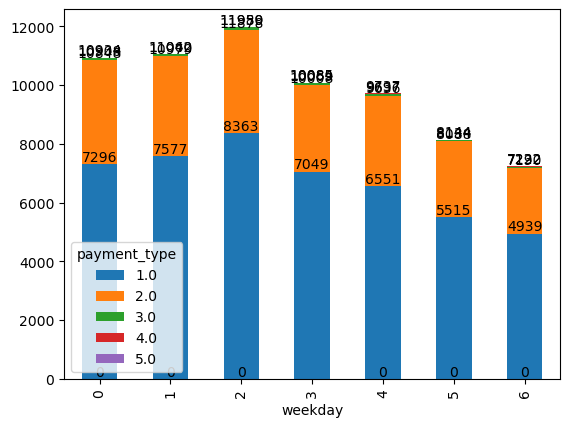

In [32]:
ax=pd.crosstab(greentaxi.weekday,greentaxi.payment_type).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

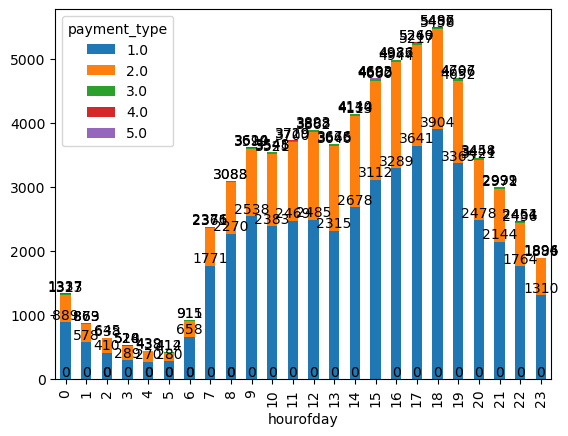

In [33]:
ax=pd.crosstab(greentaxi.hourofday,greentaxi.payment_type).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

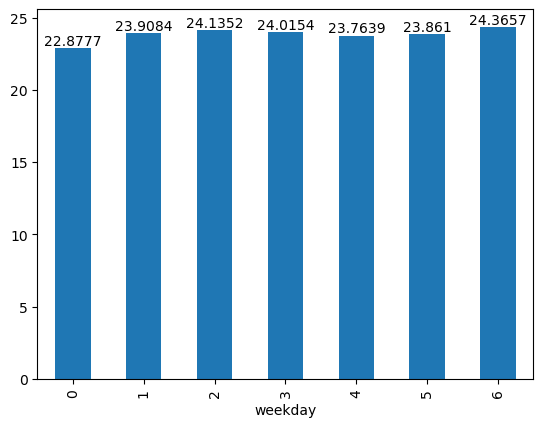

In [34]:
ax=greentaxi.total_amount.groupby(greentaxi.weekday).mean().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

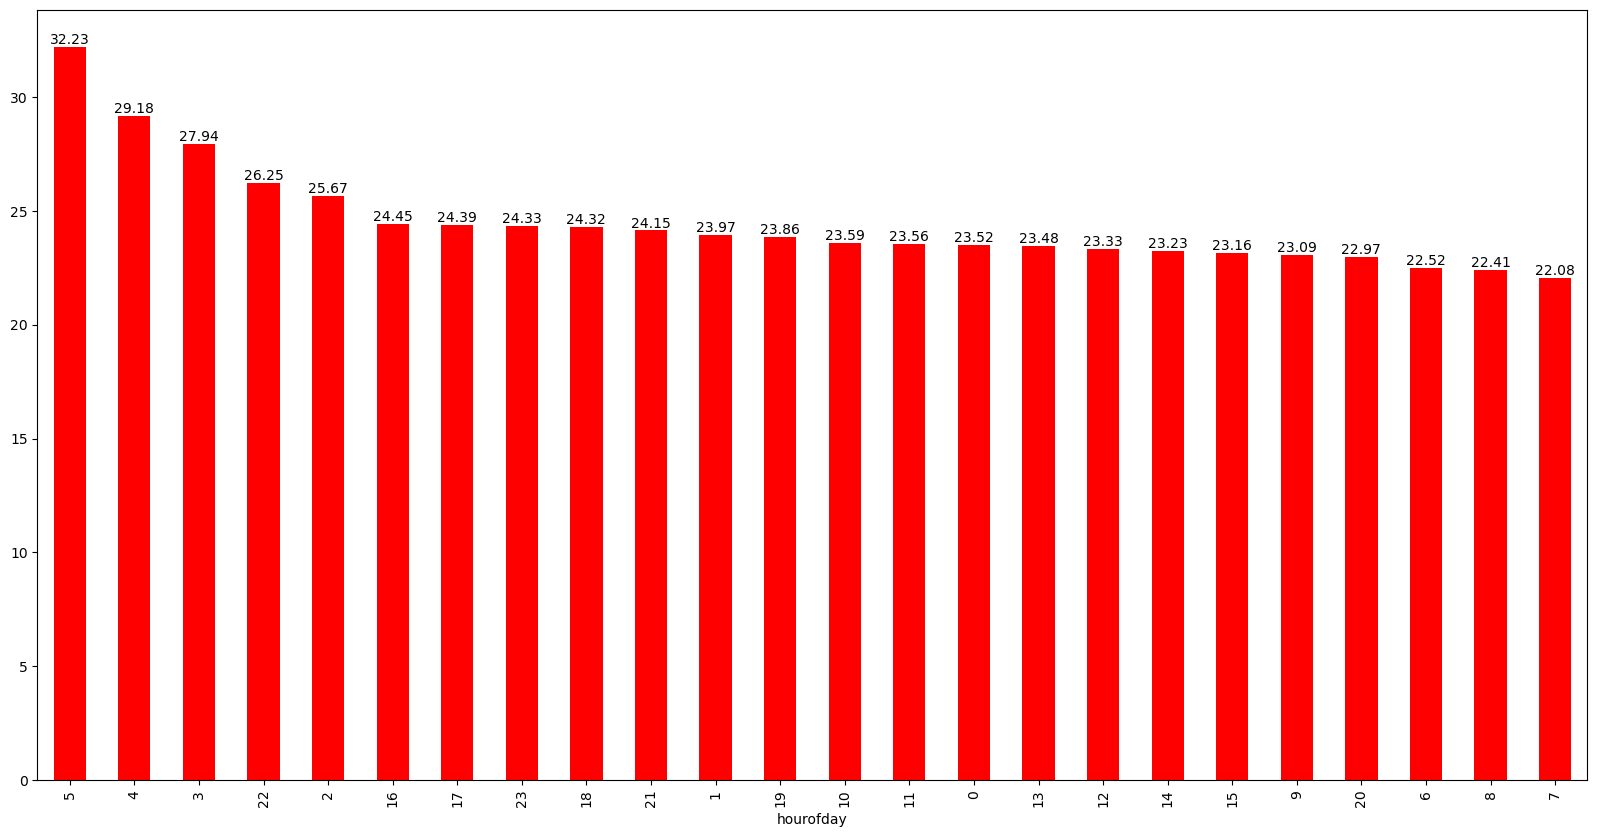

In [35]:
plt.figure(figsize=(20,10))
ax=np.round(greentaxi.total_amount.groupby(greentaxi.hourofday).mean(),2).sort_values(ascending=False).plot(kind='bar',color='red')
for i in ax.containers:
    ax.bar_label(i)

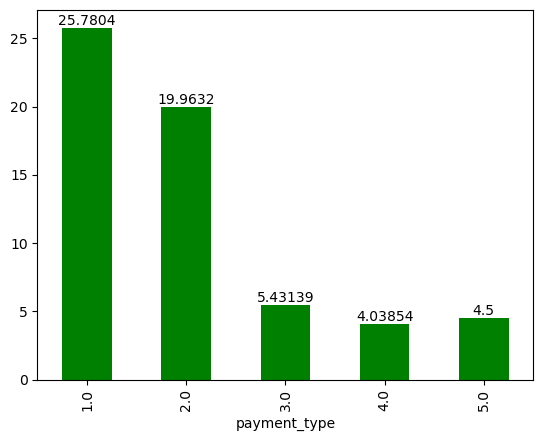

In [36]:
ax=greentaxi.total_amount.groupby(greentaxi.payment_type).mean().plot(kind='bar',color='green')
for i in ax.containers:
    ax.bar_label(i)

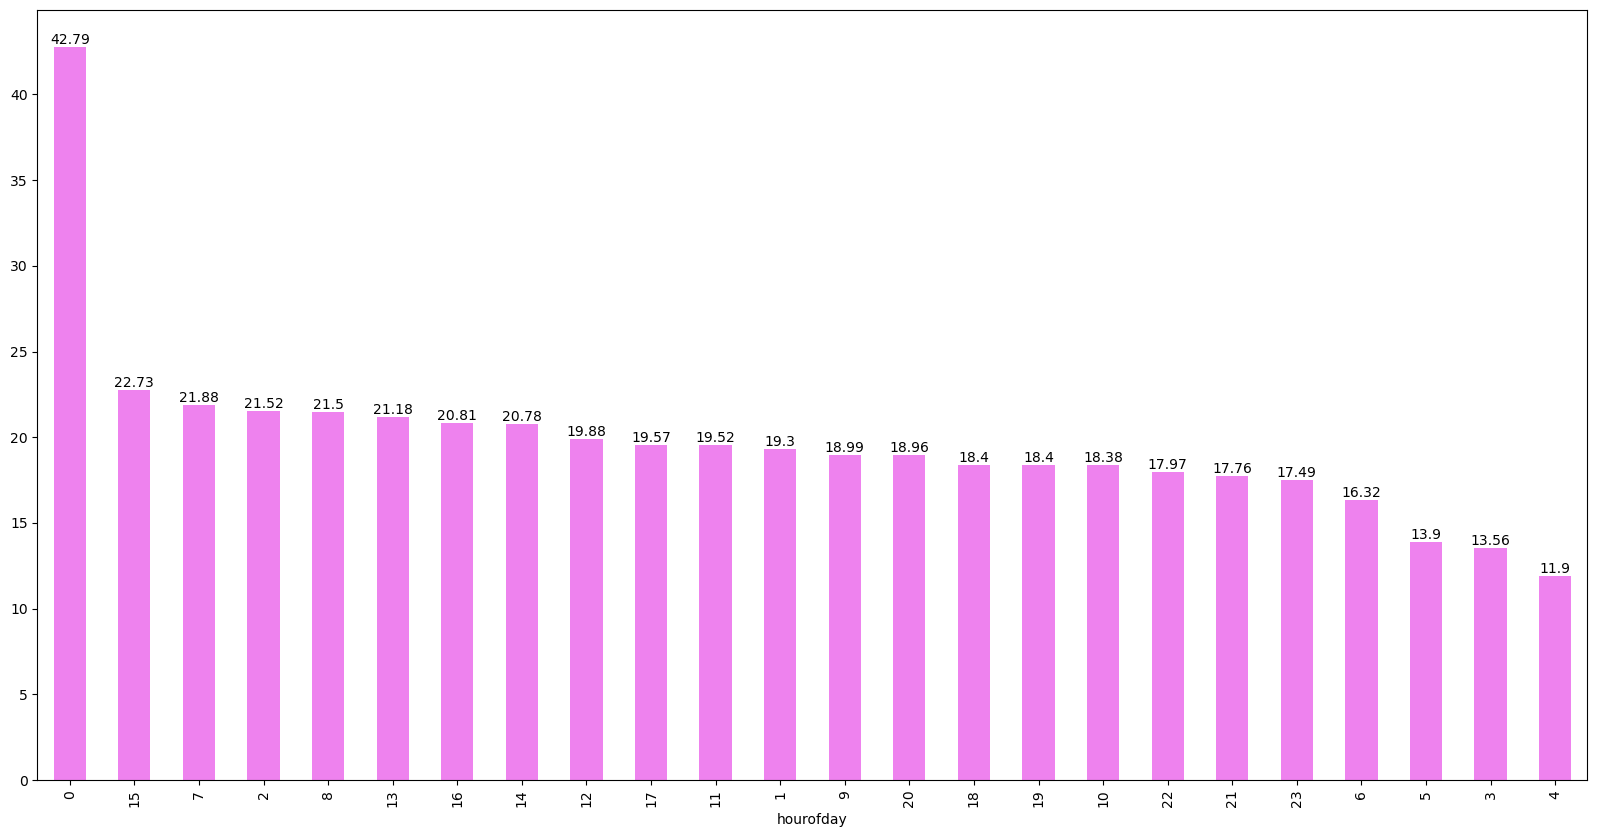

In [37]:
plt.figure(figsize=(20,10))
ax=np.round(greentaxi.trip_duration.groupby(greentaxi.hourofday).mean(),2).sort_values(ascending=False).plot(kind='bar',color='violet')
for i in ax.containers:
    ax.bar_label(i)

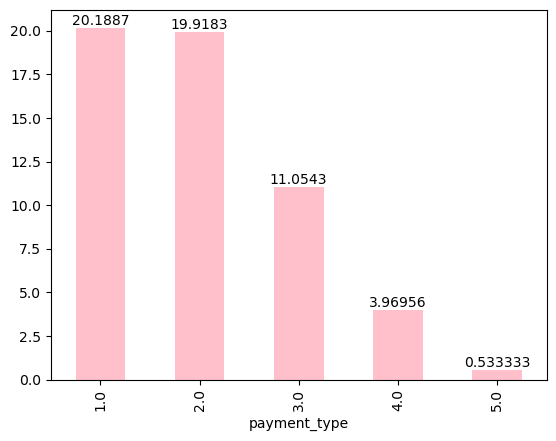

In [38]:
ax=greentaxi.trip_duration.groupby(greentaxi.payment_type).mean().plot(kind='bar',color='pink')
for i in ax.containers:
    ax.bar_label(i)

# Inferential statistics

# Hypothesis Statistics

In [ ]:
# Test null average total_amount of different trip_type is equal
# Test Null Average tip_amount of different trip_type is equal 
# Test Null Average total_amount for different weekday equal
# Test Null Average tip_amount for different weekday equal

# Test Null No Association between trip_type and payment_type
# Test Null No Association between RatecodeID and payment_type
# Test Null No Association between weekday and payment_type
# Test Null No Association between weekday and trip_type

# Ttest

In [39]:
#testnull average total_amount of different trip_type is equal
#groupby() mean & var, Null & Alt , split Data, conduct test, infer p-value

In [40]:
#testnull average total_amount of different trip_type is equal
greentaxi.total_amount.groupby(greentaxi.trip_type).mean() # Exactly 2 levels

trip_type
1.0    23.352330
2.0    38.242895
Name: total_amount, dtype: float64

In [41]:
greentaxi.total_amount.groupby(greentaxi.trip_type).var()

trip_type
1.0     268.737906
2.0    1697.012919
Name: total_amount, dtype: float64

In [42]:
# Null - There is no significant difference in Average total_amount of trip_type 1 & 2.
# Alt - There is  significant difference in Average total_amount of trip_type 1 & 2.

In [43]:
# split Data
trip_type_1=greentaxi[greentaxi.trip_type==1.0]
trip_type_2=greentaxi[greentaxi.trip_type==2.0]

In [44]:
from scipy.stats import ttest_ind

In [45]:
ttest_ind(trip_type_1.total_amount,trip_type_2.total_amount,equal_var=False)
# since pvalue=5.457304023638798e-60 is less than 0.05, Reject Null hypothesis

TtestResult(statistic=-16.84526324273241, pvalue=5.457304023638798e-60, df=2204.5760590335676)

In [46]:
greentaxi.tip_amount.groupby(greentaxi.trip_type).mean()

trip_type
1.0    2.392882
2.0    3.015369
Name: tip_amount, dtype: float64

In [47]:
greentaxi.tip_amount.groupby(greentaxi.trip_type).var()

trip_type
1.0    14.350393
2.0    78.419367
Name: tip_amount, dtype: float64

In [48]:
ttest_ind(trip_type_1.tip_amount,trip_type_2.tip_amount,equal_var=False)
# since pvalue=0.0010745858666445013 is less than 0.05, Reject Null

TtestResult(statistic=-3.27456904334513, pvalue=0.0010745858666445013, df=2208.098340550297)

# ANOVA TEST

In [49]:
# Test Null Average Total_amount for different weekday equal
greentaxi.total_amount.groupby(greentaxi.weekday).mean()

weekday
0    22.877701
1    23.908406
2    24.135164
3    24.015407
4    23.763881
5    23.861000
6    24.365744
Name: total_amount, dtype: float64

In [50]:
mon=greentaxi[greentaxi.weekday==0]
tue=greentaxi[greentaxi.weekday==1]
wed=greentaxi[greentaxi.weekday==2]
thu=greentaxi[greentaxi.weekday==3]
fri=greentaxi[greentaxi.weekday==4]
sat=greentaxi[greentaxi.weekday==5]
sun=greentaxi[greentaxi.weekday==6]

In [51]:
# Null- There is no significant difference in Average total_amount for different weekday
# Alt - There is significant difference in Average total_amount for different weekday

In [52]:
from scipy.stats import f_oneway

In [53]:
f_oneway(mon.total_amount,tue.total_amount,wed.total_amount,thu.total_amount,fri.total_amount,
         sat.total_amount,sun.total_amount)
# since pvalue=1.5781665738843712e-07 is less than 0.05, reject null

F_onewayResult(statistic=7.057962027034131, pvalue=1.5781665738843712e-07)

In [54]:
greentaxi.tip_amount.groupby(greentaxi.weekday).mean()

weekday
0    2.267933
1    2.408225
2    2.485913
3    2.510017
4    2.325503
5    2.398024
6    2.513699
Name: tip_amount, dtype: float64

In [55]:
# Null- There is no significant difference in Average total_amount for different weekday
# Alt - There is significant difference in Average total_amount for different weekday

In [56]:
f_oneway(mon.tip_amount,tue.tip_amount,wed.tip_amount,thu.tip_amount,fri.tip_amount,sat.tip_amount,sun.tip_amount)
# since pvalue=1.1035304312725308e-05 is less than 0.05 reject null

F_onewayResult(statistic=5.481926987405262, pvalue=1.1035304312725308e-05)

# Chi Square Test

In [57]:
# Test Null No Association between trip_type and payment_type
pd.crosstab(greentaxi.trip_type,greentaxi.payment_type)

payment_type,1.0,2.0,3.0,4.0,5.0
trip_type,,,,,
1.0,45800,20679,378,133,1
2.0,1490,658,24,11,0


In [58]:
from scipy.stats import chi2_contingency

In [59]:
# Null - There is no association between both variables
# Alt - There is ass0ciation between both variables

In [60]:
chi2_contingency(pd.crosstab(greentaxi.trip_type,greentaxi.payment_type))
# since pvalue=0.0004385 is less than 0.05, reject null

Chi2ContingencyResult(statistic=20.285910588961, pvalue=0.0004385012882035308, dof=4, expected_freq=array([[4.57976175e+04, 2.06636448e+04, 3.89313644e+02, 1.39455634e+02,
        9.68441900e-01],
       [1.49238254e+03, 6.73355177e+02, 1.26863561e+01, 4.54436638e+00,
        3.15580999e-02]]))

In [61]:
pd.crosstab(greentaxi.RatecodeID,greentaxi.payment_type)

payment_type,1.0,2.0,3.0,4.0,5.0
RatecodeID,,,,,
1.0,45524,20410,358,131,1
2.0,138,68,14,0,0
3.0,22,7,4,1,0
4.0,38,24,0,1,0
5.0,1565,828,26,11,0
99.0,3,0,0,0,0


In [62]:
# Null - There is no association between both variables
# Alt - There is ass0ciation between both variables

In [63]:
chi2_contingency(pd.crosstab(greentaxi.RatecodeID,greentaxi.payment_type))
# since pvalue=3.2670230054629802e-43 is less than 0.05, reject null

Chi2ContingencyResult(statistic=257.646461298014, pvalue=3.2670230054629802e-43, dof=20, expected_freq=array([[4.54099945e+04, 2.04887514e+04, 3.86018562e+02, 1.38275306e+02,
        9.60245179e-01],
       [1.50400439e+02, 6.78598896e+01, 1.27851505e+00, 4.57975540e-01,
        3.18038569e-03],
       [2.32437043e+01, 1.04874375e+01, 1.97588689e-01, 7.07780380e-02,
        4.91514153e-04],
       [4.30692168e+01, 1.94326047e+01, 3.66120219e-01, 1.31147541e-01,
        9.10746812e-04],
       [1.66124122e+03, 7.49543326e+02, 1.41217799e+01, 5.05854801e+00,
        3.51288056e-02],
       [2.05091508e+00, 9.25362130e-01, 1.74342961e-02, 6.24512100e-03,
        4.33688958e-05]]))

In [64]:
pd.crosstab(greentaxi.weekday,greentaxi.payment_type)

payment_type,1.0,2.0,3.0,4.0,5.0
weekday,,,,,
0,7296,3552,60,26,0
1,7577,3402,61,22,0
2,8363,3515,81,21,0
3,7049,2959,61,15,1
4,6551,3085,61,40,0
5,5515,2573,46,10,0
6,4939,2251,32,10,0


In [65]:
# Null - There is no association between both variables
# Alt - There is ass0ciation between both variables

In [66]:
chi2_contingency(pd.crosstab(greentaxi.weekday,greentaxi.payment_type))
# since pvalue=4.532248995318973e-08 is less than 0.05, reject Null

Chi2ContingencyResult(statistic=80.80132526421853, pvalue=4.532248995318973e-08, dof=24, expected_freq=array([[7.47490184e+03, 3.37263651e+03, 6.35421979e+01, 2.27613843e+01,
        1.58065169e-01],
       [7.56240755e+03, 3.41211863e+03, 6.42860612e+01, 2.30278428e+01,
        1.59915575e-01],
       [8.18998757e+03, 3.69527944e+03, 6.96209559e+01, 2.49388499e+01,
        1.73186457e-01],
       [6.89449287e+03, 3.11075903e+03, 5.86082921e+01, 2.09940151e+01,
        1.45791771e-01],
       [6.65658672e+03, 3.00341702e+03, 5.65859138e+01, 2.02695811e+01,
        1.40760980e-01],
       [5.56755081e+03, 2.51204973e+03, 4.73283025e+01, 1.69534218e+01,
        1.17732096e-01],
       [4.94407263e+03, 2.23073964e+03, 4.20282765e+01, 1.50549050e+01,
        1.04547952e-01]]))

In [67]:
pd.crosstab(greentaxi.trip_type,greentaxi.weekday)

weekday,0,1,2,3,4,5,6
trip_type,,,,,,,
1.0,10635,10775,11679,9839,9425,7782,6856
2.0,299,287,301,246,312,362,376


In [68]:
# Null - There is no association between both variables
# Alt - There is ass0ciation between both variables

In [69]:
chi2_contingency(pd.crosstab(greentaxi.trip_type,greentaxi.weekday))
# since Pvalue=3.458694063594574e-39 is less than 0.05, reject null

Chi2ContingencyResult(statistic=194.0751725639184, pvalue=3.458694063594574e-39, dof=6, expected_freq=array([[10588.94373609, 10712.9042993 , 11601.93396363,  9766.73656287,
         9429.71878162,  7886.99083471,  7003.77182178],
       [  345.05626391,   349.0957007 ,   378.06603637,   318.26343713,
          307.28121838,   257.00916529,   228.22817822]]))

# Split data into NUMCOLS and OBJCOLS FOR MODEL BUILDING 
   

In [70]:
greentaxi.columns


Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'trip_duration',
       'weekday', 'hourofday'],
      dtype='object')

In [71]:
# split Dta into numeric and objectols
numericcols=greentaxi[['trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge','congestion_surcharge','trip_duration']]

In [72]:
objectcols=greentaxi[['store_and_fwd_flag', 'RatecodeID','passenger_count','payment_type','trip_type','weekday','weekday','weekday','hourofday']]

In [73]:
numericcols.head()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,trip_duration
0,6.99,28.90,1.0,0.5,0.00,0.00,1.0,0.00,13.266667
1,6.60,30.30,1.0,0.5,5.00,0.00,1.0,2.75,20.366667
2,1.34,9.30,1.0,0.5,2.36,0.00,1.0,0.00,6.883333
3,7.79,22.73,0.0,0.0,2.29,6.55,1.0,0.00,20.450000
4,0.70,6.50,1.0,0.5,0.00,0.00,1.0,0.00,3.466667


In [74]:
objectcols.columns

Index(['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type',
       'trip_type', 'weekday', 'weekday', 'weekday', 'hourofday'],
      dtype='object')

In [75]:
objectcols_dummy=pd.get_dummies(objectcols,columns=['store_and_fwd_flag','RatecodeID','passenger_count','payment_type',
                                                   'trip_type','weekday','hourofday'])

In [76]:
X=pd.concat([numericcols,objectcols_dummy],axis=1)

In [77]:
y=greentaxi.total_amount

In [78]:
import seaborn as sns

<Figure size 3000x1500 with 0 Axes>

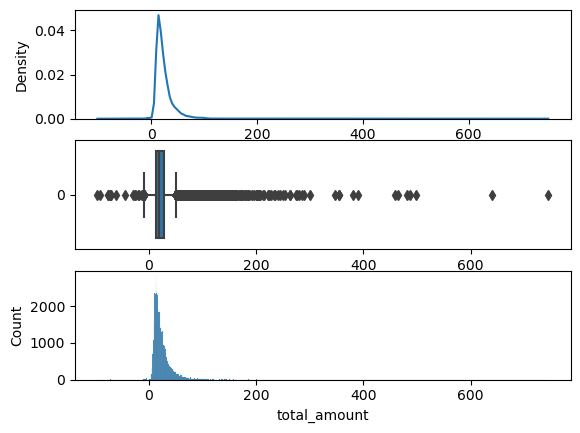

In [79]:
#histogram,boxplot & Density curve - y
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.kdeplot(y,ax=ax[0])
sns.boxplot(y,orient='h',ax=ax[1])
sns.histplot(y,ax=ax[2])
plt.show()

C:\Users\PREETHAM KARRA\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PREETHAM KARRA\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PREETHAM KARRA\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PREETHAM KARRA\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PREETHAM KARRA\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PREETHAM KARRA\anaconda3\lib\site-packages\pandas\core\arraylike.py:

<Figure size 3000x1500 with 0 Axes>

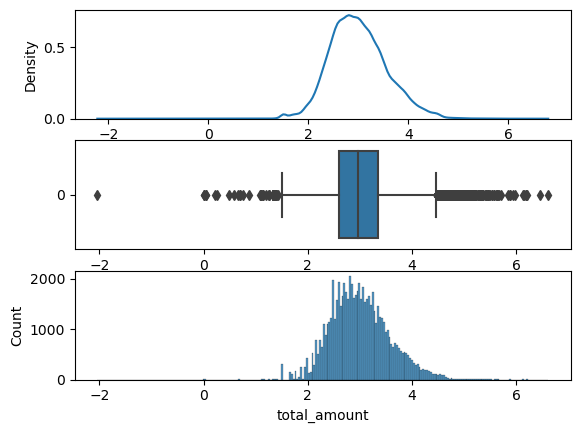

In [80]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.kdeplot(np.log(y),ax=ax[0])
sns.boxplot(np.log(y),orient='h',ax=ax[1])
sns.histplot(np.log(y),ax=ax[2])
plt.show()

In [81]:
numericcols2=numericcols

In [82]:
numericcols2['total_amount']=greentaxi.total_amount

C:\Users\PREETHAM KARRA\AppData\Local\Temp\ipykernel_19092\3306182408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericcols2['total_amount']=greentaxi.total_amount


<Axes: >

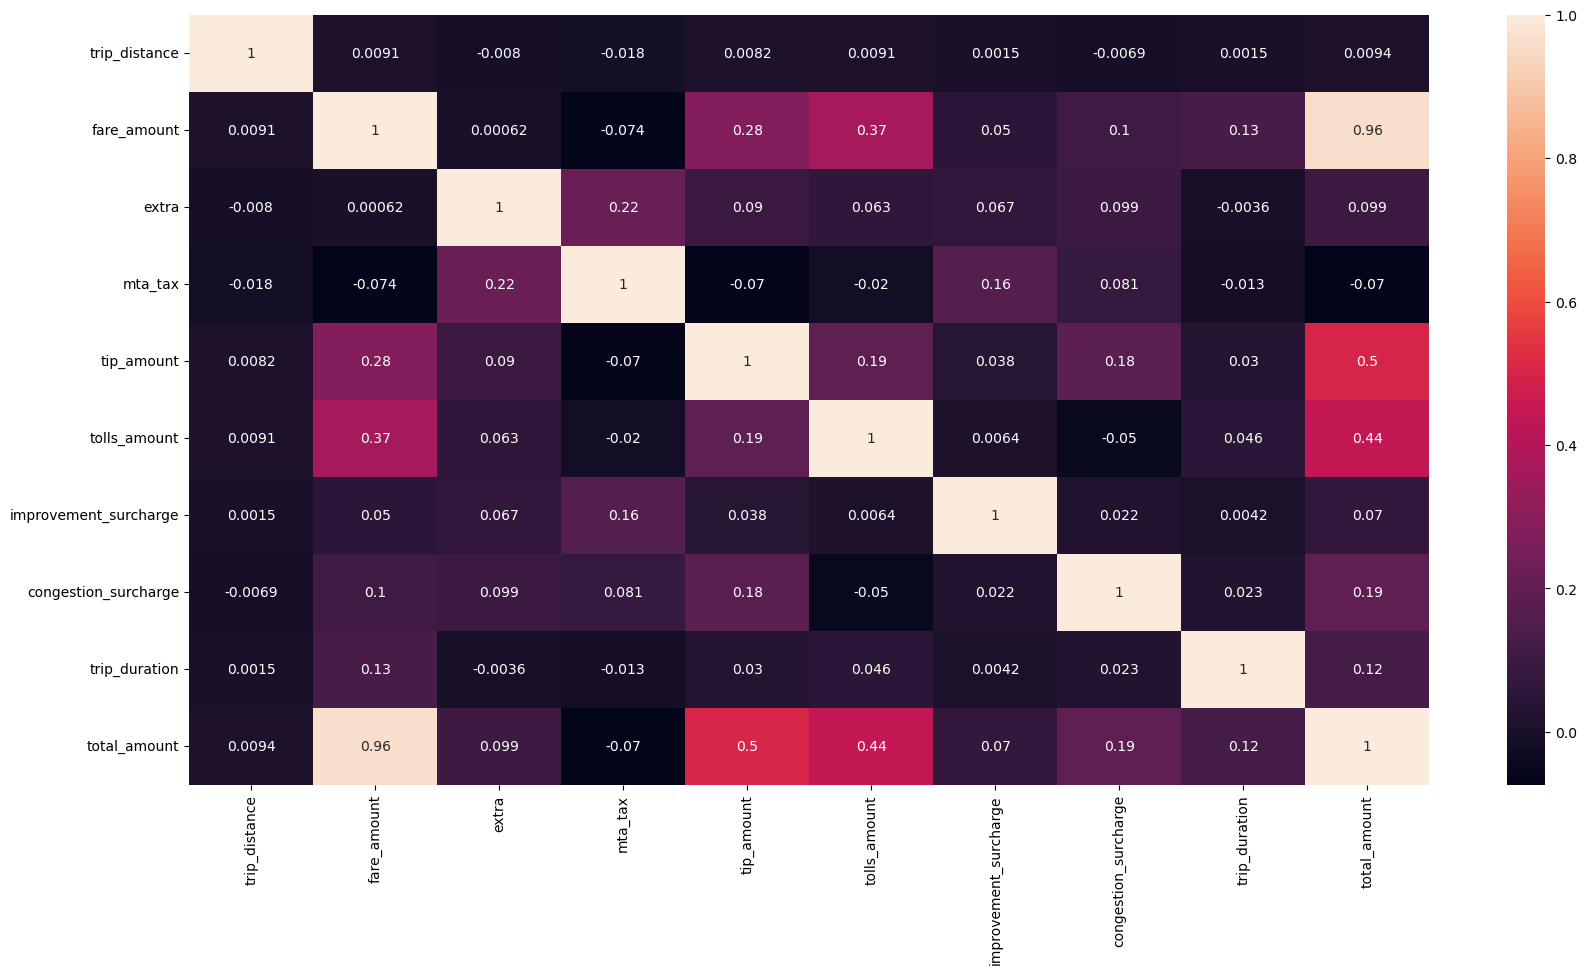

In [83]:
plt.figure(figsize=(20,10))
sns.heatmap(numericcols2.corr(),annot=True)

In [84]:
X=X.drop('fare_amount',axis=1)

# LINEAR REGRESSION

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
reg=LinearRegression()

In [87]:
regmodel=reg.fit(X,y)

In [88]:
regmodel.score(X,y)

0.46153609909092563

In [89]:
regpredict=regmodel.predict(X)

In [90]:
regresid=y-regpredict

In [91]:
np.sqrt(np.mean(regresid**2))#RMSE

13.138104982545146

# DECISION TREE


In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
tree=DecisionTreeRegressor(max_depth=8)

In [94]:
treemodel=tree.fit(X,y)

In [95]:
treemodel.score(X,y)

0.854601870494865

In [96]:
treepredict=treemodel.predict(X)

In [97]:
treeresid=y=treepredict

In [98]:
np.sqrt(np.mean(treeresid**2))#RMSE

29.007763873758705

# RANDOM FOREST

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
rf=RandomForestRegressor(max_depth=10)

In [101]:
rfmodel=rf.fit(X,y)

In [102]:
rfmodel.score(X,y)

0.9924250766935946

In [103]:
rfpredict=rfmodel.predict(X)

In [104]:
rfresid=y-rfpredict

In [105]:
np.sqrt(np.mean(rfresid**2))#RMSE

1.4405404937975306

# Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

In [107]:
gb=GradientBoostingRegressor()

In [108]:
gbmodel=gb.fit(X,y)

In [109]:
gbmodel.score(X,y)

0.9602191524018191

In [110]:
gbpredict=gbmodel.predict(X)

In [111]:
gbresid=y-gbpredict

In [112]:
np.sqrt(np.mean(gbresid**2))# RMSE

3.30121163386406

# KNN

In [113]:
from sklearn.neighbors import KNeighborsRegressor

In [114]:
kn=KNeighborsRegressor()

In [115]:
knmodel=kn.fit(X,y)

In [116]:
knmodel.score(X,y)

0.9261427454270896

In [117]:
knpredict=knmodel.predict(X)

In [118]:
knid=y-knpredict

In [119]:
np.sqrt(np.mean(knid**2))#RMSE

4.498139611881697

# Support Vector Machine(SVM)

In [120]:
from sklearn.svm import SVR

In [121]:
svm=SVR(C=6)

In [122]:
svmmodel=svm.fit(X,y)

In [123]:
svmmodel.score(X,y)

0.5422705828101355

In [124]:
svmpredict=svmmodel.predict(X)

In [125]:
svresid=y-svmpredict

In [126]:
np.sqrt(np.mean(svresid**2))#RMSE

11.198007731627479

# # Linear Regression:

R-squared: 0.461
RMSE: 13.13
# Decision Tree Regression:

R-squared: 0.854
RMSE: 25.00
# Random Forest Regression:

R-squared: 0.99
RMSE: 1.44
# Gradient Boosting Regression:

R-squared: 0.96
RMSE: 3.301

# K-Nearest Neighbors Regression:

R-squared: 0.92
RMSE: 4.49

# Support Vector Regressor:

R-squared: 0.542
RMSE: 11.19

# SUMMARY
Among the models you've evaluated, the Random Forest Regression model stands out as the best performer. It has the highest R-squared value (0.9302), indicating that it explains a significant portion of the variance in the total fare amounts. Additionally, it has the lowest RMSE (4.30), which means it has the smallest average prediction error in terms of fare amounts.

The K-Nearest Neighbors (KNN) Regression model also performs very well with a high R-squared value (0.9236) and a low RMSE (4.50). It is a strong contender for the best-fit model.

The Decision Tree and Gradient Boosting models have decent R-squared values and perform reasonably well, but they have higher RMSE values compared to the Random Forest and KNN models.

The Linear Regression and Support Vector Regressor models have relatively lower R-squared values and higher RMSE values, indicating that they may not explain the variance in fare amounts as well as the other models.

# Best Fit Model:
Based on the provided performance metrics, the Random Forest Regression model appears to be the best fit for your taxi fare prediction task. It has the highest R-squared value and the lowest RMSE, indicating its ability to provide accurate predictions and explain a significant portion of the variance in fare amounts. However, it's also a good practice to consider other factors, such as model interpretability and computational complexity, when selecting the final model for deployment.